### Student Information
Name: 張巍瀚

Student ID: 110071002

GitHub ID: 

Kaggle name:

Kaggle private scoreboard snapshot:

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

## Set up

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


## Exercise 1

### 1. Train dataset

In [8]:
import nltk
import helpers.data_mining_helpers as dmh
nltk.download('punkt')
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))


from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_df_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(train_df_counts[0])

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  (0, 1868)	1
  (0, 9748)	1
  (0, 4571)	1
  (0, 9678)	2
  (0, 371)	1
  (0, 5957)	1
  (0, 4101)	1
  (0, 9149)	1
  (0, 369)	1
  (0, 3053)	1
  (0, 61)	1
  (0, 840)	1
  (0, 7358)	1
  (0, 6261)	1
  (0, 377)	1
  (0, 41)	1
  (0, 3893)	1
  (0, 8264)	1
  (0, 6405)	1


In [9]:
train_df_counts.shape

(3613, 10115)

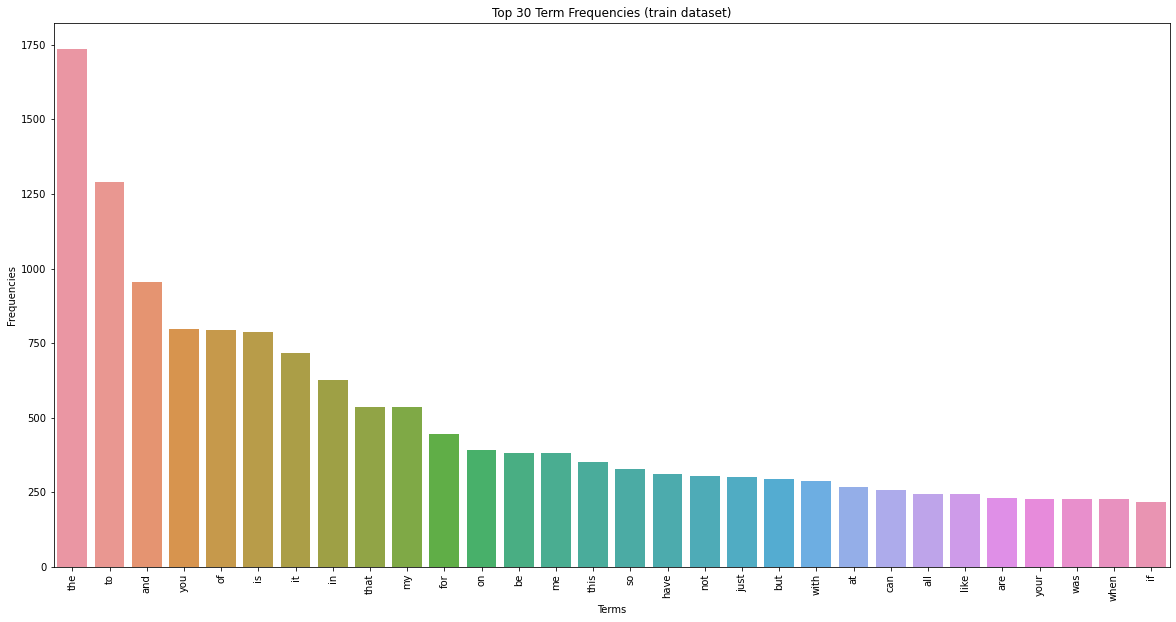

In [10]:
import numpy as np
term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]

import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'Terms': count_vect.get_feature_names_out(),
    'Frequencies': term_frequencies
}
df = pd.DataFrame(data)


top_n = 30
top_terms = df.nlargest(top_n, 'Frequencies')


plt.figure(figsize=(20, 10))
g = sns.barplot(x=top_terms['Terms'], y=top_terms['Frequencies'])
g.set_xticklabels(top_terms['Terms'], rotation=90)
plt.title(f'Top {top_n} Term Frequencies (train dataset)')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()

### 2. Test dataset

In [11]:
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df_counts = count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
print(test_df_counts[0])

  (0, 290)	1
  (0, 1832)	1
  (0, 1739)	2
  (0, 723)	1
  (0, 1903)	1
  (0, 1745)	2
  (0, 1893)	1
  (0, 815)	1
  (0, 141)	1
  (0, 684)	1
  (0, 623)	1
  (0, 1484)	1
  (0, 1193)	1
  (0, 1025)	1
  (0, 619)	1
  (0, 201)	1
  (0, 1178)	1
  (0, 506)	1
  (0, 909)	1
  (0, 1311)	1


In [12]:
test_df_counts.shape

(347, 1949)

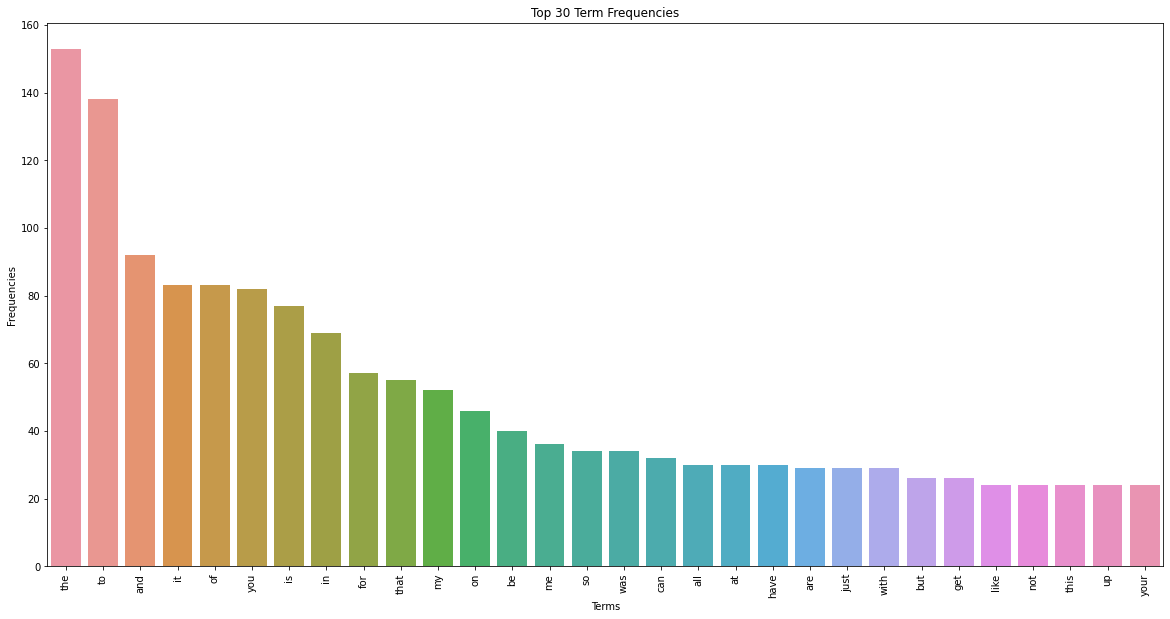

In [13]:
term_frequencies_test = np.asarray(test_df_counts.sum(axis=0))[0]

data = {
    'Terms': count_vect.get_feature_names_out(),
    'Frequencies': term_frequencies_test
}
df = pd.DataFrame(data)


top_n = 30
top_terms = df.nlargest(top_n, 'Frequencies')


plt.figure(figsize=(20, 10))
g = sns.barplot(x=top_terms['Terms'], y=top_terms['Frequencies'])
g.set_xticklabels(top_terms['Terms'], rotation=90)
plt.title(f'Top {top_n} Term Frequencies')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.show()

In [14]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

---

In [15]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_vectorizer = CountVectorizer() 


BOW_vectorizer.fit(train_df['text'])

train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

train_data_BOW_features.shape

(3613, 10115)

In [17]:
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [18]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

## Exercise 2

In [19]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 


tfidf_vectorizer.fit(train_df['text'])

train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

In [20]:
import nltk

# build analyzers (bag-of-words)
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape

(3613, 1000)

In [21]:
feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday',
       'be'], dtype=object)

---

In [22]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [23]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'joy', 'anger', 'anger', 'fear', 'fear',
       'sadness', 'joy'], dtype=object)

In [24]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [25]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.64      0.65        84
        fear       0.66      0.69      0.67       110
         joy       0.69      0.70      0.69        79
     sadness       0.63      0.59      0.61        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [26]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[54 18  9  3]
 [10 76  9 15]
 [ 5 11 55  8]
 [12 11  7 44]]


In [27]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

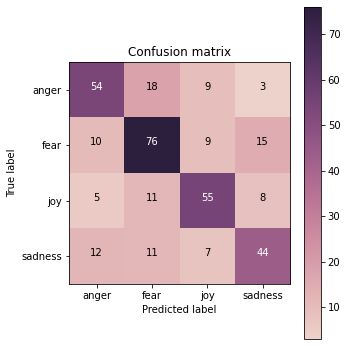

In [28]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Exercise 3

1. The model performs best on the "fear" class
2. The "anger" class is often confused with "fear," as seen by the 18 misclassifications.

---

## Exercise 4

In [29]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_train_pred1 = nb_model.predict(X_train)
y_test_pred1 = nb_model.predict(X_test)

## so we get the pred result
y_test_pred1[:10]

array(['anger', 'anger', 'joy', 'fear', 'anger', 'anger', 'fear', 'fear',
       'sadness', 'joy'], dtype='<U7')

In [31]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred1)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred1))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [33]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_true=y_test, y_pred=y_test_pred1) 
print(cm1)

[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


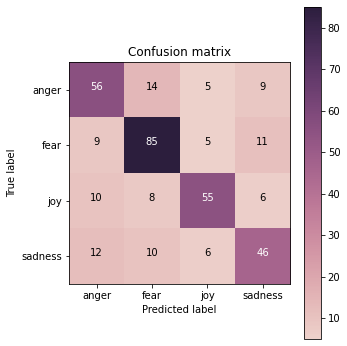

In [34]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm1, classes=my_tags, title='Confusion matrix')

---

## Exercise 5

- Compare:
1. Naive Bayes has better overall accuracy, particularly for the "fear" and "sadness" classes.
2. Naive Bayes has lower misclassification rates across all classes compared to DecisionTree.
- Reasons:
1. NB assumes that features are independent (conditionally independent given the class). Performs well on text data,especially with features like TF-IDF or Bag of Words, because text data often meets the independence assumption reasonably well.
2. Decision Tree prone to overfitting

---

In [35]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [36]:
import keras

AttributeError: module 'numpy' has no attribute 'typeDict'

---

In [37]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [38]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

C:\Users\USER\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


,id,text,text_tokenized
2642,30638,@colmjoconnor well it was after my heyday too ...,"[@, colmjoconnor, well, it, was, after, my, he..."
3574,40747,@Damn_It_Dillon @SamUndomiel of course! This i...,"[@, Damn_It_Dillon, @, SamUndomiel, of, course..."
2058,30054,You know you're in love when all you can do is...,"[You, know, you, 're, in, love, when, all, you..."
3057,40230,Lost: Geelong football team. \nLast seen enter...,"[Lost, :, Geelong, football, team, ., \nLast, ..."
828,10828,I love when #girls are busy in teaching how to...,"[I, love, when, #, girls, are, busy, in, teach..."


In [39]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'colmjoconnor', 'well', 'it', 'was', 'after', 'my', 'heyday', 'too', 'I', "'m", 'afraid', ',', 'I', 'was', 'expecting', '1st', 'baby', 'I', 'reckon', '.', 'Now', 'aged', '15', '*', 'gulps', '*', 'I', "'m", 'so', 'old', ':', '-', ')']),
       list(['@', 'Damn_It_Dillon', '@', 'SamUndomiel', 'of', 'course', '!', 'This', 'is', 'a', 'happy', 'hentai', ',', 'not', 'a', 'sad', 'or', 'gloomy', 'one']),
       list(['You', 'know', 'you', "'re", 'in', 'love', 'when', 'all', 'you', 'can', 'do', 'is', 'smile', 'whenever', 'you', 'talk', 'about', 'how', 'he', 'is', 'to', 'someone', '.'])],
      dtype=object)

In [40]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [41]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.7604702 ,  0.11497829,  0.19732662,  0.15268607, -0.4452686 ,
       -0.8065869 ,  0.4447871 ,  1.014941  , -0.33944625, -0.4622463 ,
       -0.3107448 , -1.1013256 , -0.54698014,  0.13784981,  0.07413893,
       -0.72586894,  0.24609645, -0.5818146 ,  0.03570706, -0.6930158 ,
        0.40121523,  1.0576928 ,  0.46592465,  0.3249552 ,  0.3798145 ,
        0.18872362, -1.0173874 ,  0.29606277, -0.3820862 ,  0.33299747,
        0.3740344 , -0.2965435 ,  0.6159386 , -0.7694195 , -0.30374047,
        0.86943895,  0.5018516 , -0.28652266, -0.70747334, -0.60848707,
       -0.0153436 ,  0.18266103, -0.46590352,  0.06998522,  0.5864099 ,
       -0.44336286, -1.0636268 ,  0.29966378,  0.5903375 ,  0.23173247,
       -0.15549126, -0.84929216,  0.5289262 , -0.07181592, -0.31074107,
       -0.47363997,  0.04957158, -0.28239173,  0.21924521,  0.4203427 ,
        0.01877846, -0.27079552,  1.0023715 , -0.0483765 , -0.51870453,
        0.6365497 , -0.009959  ,  0.76898044, -1.2312434 ,  0.52

In [42]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9391291737556458),
 ('successful', 0.9341046810150146),
 ('blessed', 0.9159547090530396),
 ('Be', 0.9122551083564758),
 ('free', 0.9084687232971191),
 ('kinda', 0.9083366990089417),
 ('right', 0.9056280255317688),
 ('cats', 0.9051655530929565),
 ('🕋', 0.9048587083816528),
 ('Online', 0.9032706618309021)]

In [44]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [45]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---

## Exercise 6

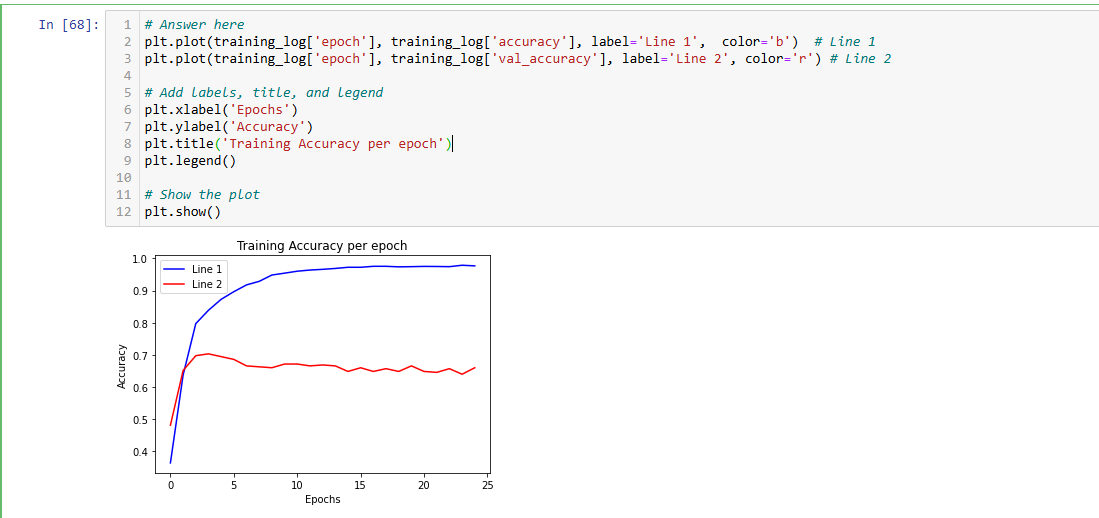

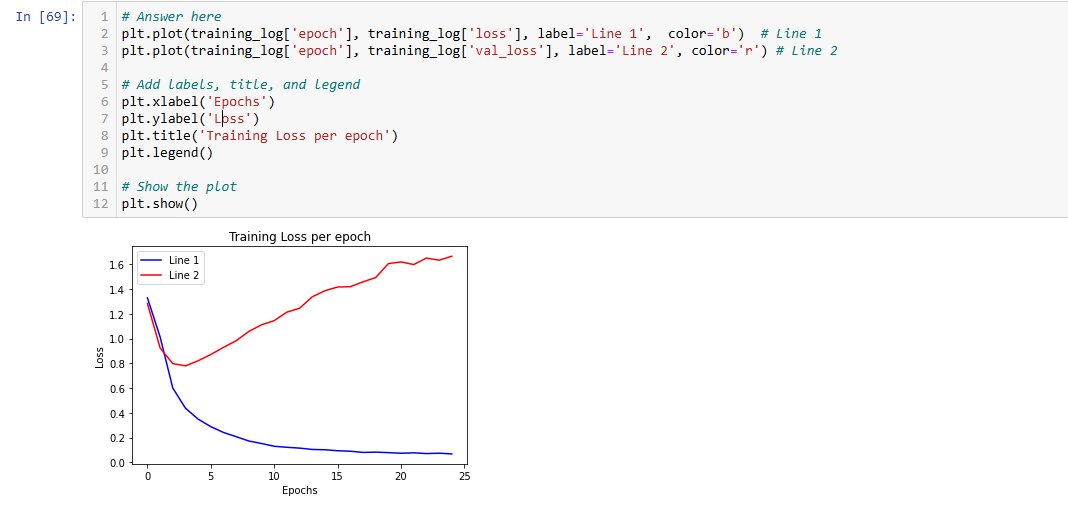

1. The model performs exceptionally well on the training set, indicating that it is learning effectively from the training data.
2. The validation accuracy does not improve much after a certain point, and the gap between training and validation accuracy suggests overfitting.

1. The model is minimizing the error on the training data effectively.
2. The increasing validation loss indicates that the model's performance on unseen data worsens as training progresses. This is another indicator of overfitting.

## Exercise 7

Concatenate word vectors in the sentence into a single large vector.
- Steps:
1. Retrieve vectors for all words in the sentence.
2. Concatenate them in sequence (may need to pad or truncate to a fixed length). 

---

In [49]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted

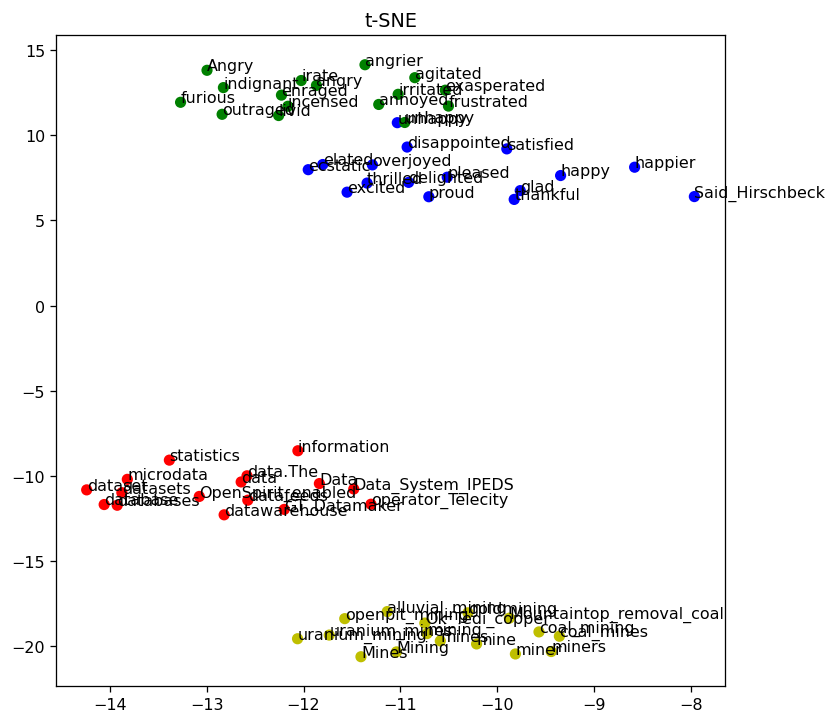

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
    
plt.title('t-SNE')
plt.show()

In [52]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
    
plt.title('UMAP')
plt.show()


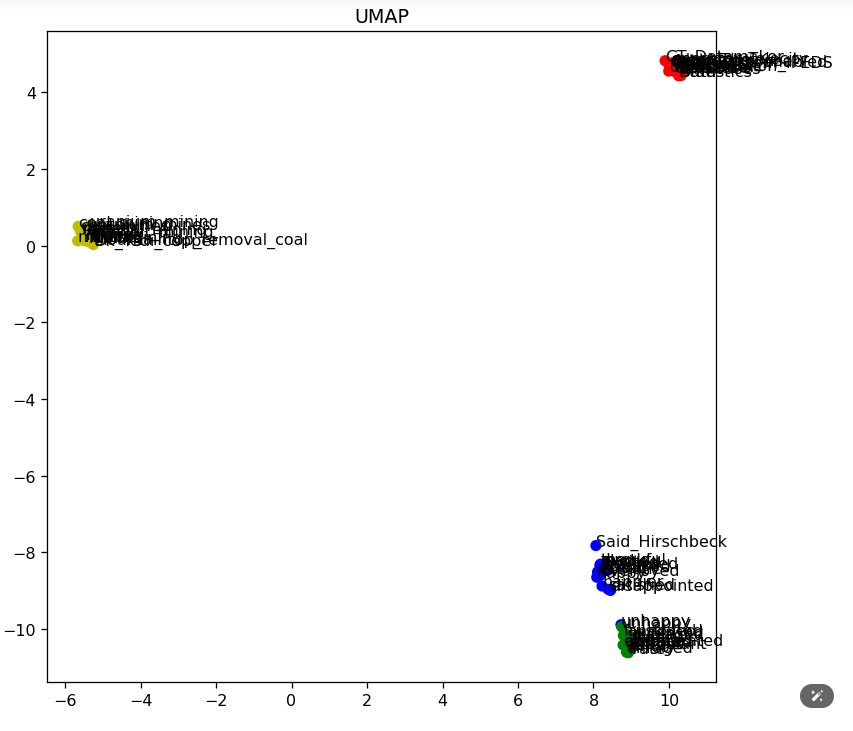

## Exercise 8

1. t-SNE spread wider.
2. UMAP is more dense.

---

In [55]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable knowledge or information from raw data.

### Types of Data Mining

*   **Supervised Learning**: The algorithm makes predictions on new data based on labeled training data.
*   **Unsupervised Learning**: The algorithm identifies patterns or structures in the data without any prior labeling.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning.

### Data Mining Techniques

*   **Clustering**: Grouping similar data points into clusters.
*   **Classification**: Predicting categorical labels for new data.
*   **Regression**: Estimating continuous values for new data.
*   **Association Rule Mining**: Discovering relationships between items in a dataset.

### Benefits of Data Mining

*   **Improved Decision-Making**: Identifying p

In [56]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [57]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable knowledge or information from raw data.

### Types of Data Mining

*   **Supervised Learning**: The algorithm makes predictions on new data based on labeled training data.
*   **Unsupervised Learning**: The algorithm identifies patterns or structures in the data without any prior labeling.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning.

### Data Mining Techniques

*   **Clustering**: Grouping similar data points into clusters.
*   **Classification**: Predicting categorical labels for new data.
*   **Regression**: Estimating continuous values for new data.
*   **Association Rule Mining**: Discovering relationships between items in a dataset.

### Benefits of Data Mining

*   **Improved Decision-Making**: Identifying patterns and insights that inform business decisions.
*   **Increased Efficiency**: Automating tasks and streamlining processes.
*   **Enhanced Customer Experience**: Personalized recommendations and targeted marketing.

### Challenges of Data Mining

*   **Data Quality Issues**: Handling missing, duplicate, or erroneous data.
*   **Data Volume and Complexity**: Managing large datasets with multiple variables.
*   **Interpretability and Explainability**: Communicating complex results to non-technical stakeholders.

### Real-World Applications of Data Mining

*   **Marketing Automation**: Personalized product recommendations and targeted advertising.
*   **Customer Relationship Management (CRM)**: Analyzing customer behavior for improved engagement.
*   **Healthcare Analytics**: Identifying patterns in patient data for better treatment outcomes.
*   **Finance and Banking**: Detecting fraudulent transactions and predicting credit risk.

## Exercise 9 

In [58]:
# Answer here
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are an expert in data mining. Provide detailed and accurate explanations.'
    },
])

print(response['message']['content'])

---

In [59]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the center of the frame, a Shiba Inu dog with vibrant orange and white fur is captured in mid-air. The dog's mouth is wide open, revealing its teeth, as if it's yipping or barking at something unseen. Its front legs are stretched out in anticipation of the landing, while its hind legs remain tucked under its body, ready to propel it forward once again.

The background is a blur of greenery, suggesting that this lively scene is taking place in an open park or garden. The focus on the dog and the soft focus on the surroundings give a sense of motion and energy to the image. Despite being a still photo, one can almost feel the excitement and playfulness emanating from it.

In [60]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image features a **gray tabby cat** standing on its hind legs with its front paws stretched out in the air. The cat's tail is raised, and it has an alert expression as if something caught its attention off-camera. The background of the image is plain white, which contrasts with the gray color of the cat and brings it into focus. There are no other objects or text present in the image. The cat appears to be stationary with no indication of movement. The relative position of the cat suggests it is centrally located within the frame.

## Exercise 10

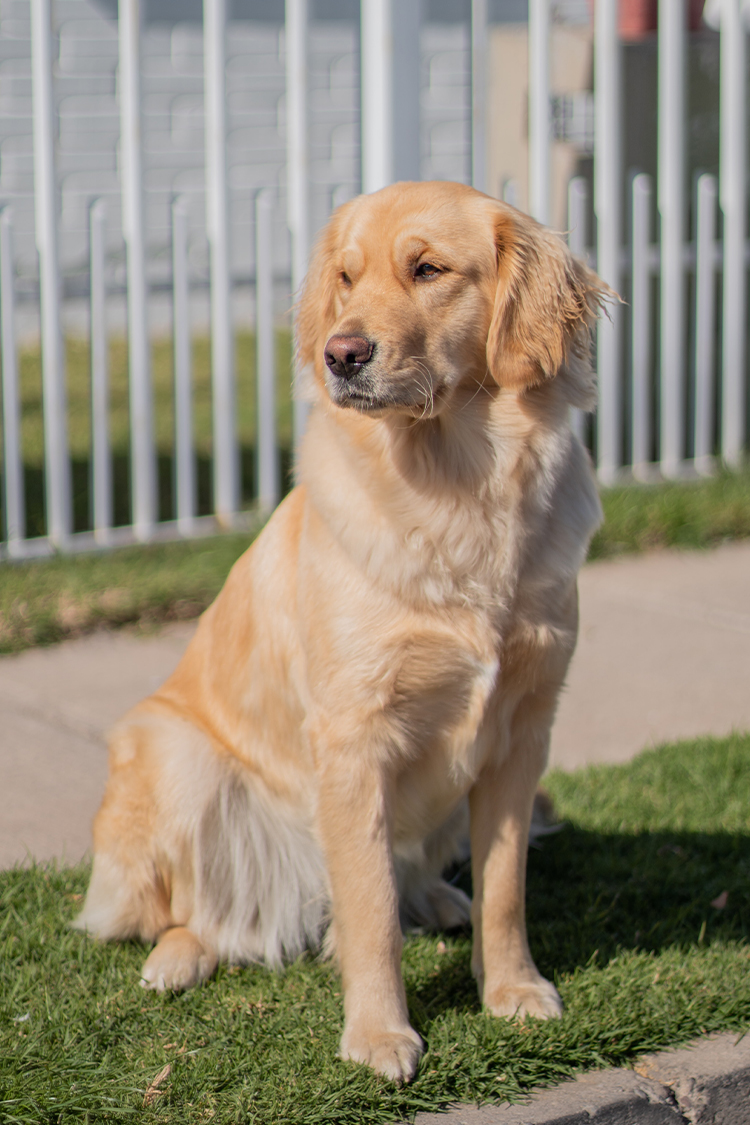

In [61]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'Is it a golden retriever?',
        'images': ['./pics/golden.jpg'] #Image with the cat
    },
])

display(Markdown(response4['message']['content']))

Yes, the dog in the image is a Golden Retriever. It has been trained to assist people with disabilities and is sitting on a grassy area near a fence.

---

In [62]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [64]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

KeyboardInterrupt: 

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [66]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")

In [67]:
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.464157,1.199230,0.527378,1.160825
1,1,0.635760,0.878343,0.585014,0.994163
2,2,0.730141,0.690085,0.590778,1.092552
3,3,0.795184,0.564868,0.576369,1.119069
4,4,0.830888,0.454494,0.582133,1.260909
5,5,0.862441,0.384078,0.573487,1.312000
6,6,0.883200,0.316203,0.576369,1.420619
7,7,0.911154,0.263574,0.585014,1.601106
8,8,0.920011,0.221728,0.576369,1.633095
9,9,0.929698,0.196005,0.556196,1.813899


## Exercise 12

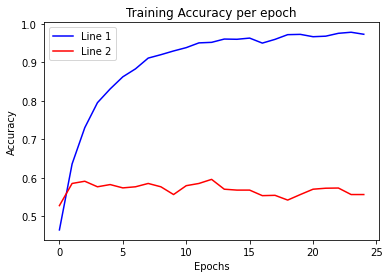

In [68]:
# Answer here
plt.plot(training_log['epoch'], training_log['accuracy'], label='Line 1',  color='b')  # Line 1
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Line 2', color='r') # Line 2

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per epoch')
plt.legend()

# Show the plot
plt.show()

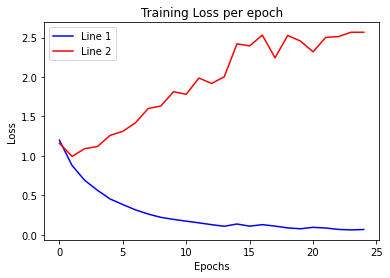

In [69]:
# Answer here
plt.plot(training_log['epoch'], training_log['loss'], label='Line 1',  color='b')  # Line 1
plt.plot(training_log['epoch'], training_log['val_loss'], label='Line 2', color='r') # Line 2

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per epoch')
plt.legend()

# Show the plot
plt.show()

### Discussion
- Overfitting:

  The model is overfitting the training data, as evidenced by:
  1. The high training accuracy (close to 1.0) and very low training loss.
  2. The plateau in validation accuracy (~0.55–0.58) and the rising validation loss after epoch ~5.

- Generalization Gap:

  1. The gap between training and validation performance indicates that the model is not generalizing well to unseen data.


- A. Domain Mismatch
  - LLM embeddings are pre-trained on a broad, general corpus, which might not align with the specific domain or distribution of your dataset.
  - If the task-specific data contains nuances or features not well-captured by the embeddings, the model struggles to generalize, as observed in the plateau of validation accuracy.
- B. Overfitting to Embedding Space
  - The model quickly fits the high-dimensional embedding space of the training data, leading to low training loss and high accuracy.
  - However, without additional regularization or a more diverse dataset, it memorizes the training set instead of learning generalizable patterns.
- C. Insufficient Training Examples
  - While embeddings reduce the amount of task-specific labeled data needed, they don’t eliminate the need for diversity in the training set.
  - If the dataset is small or lacks variety, the model fails to generalize, as seen in the validation performance.
- D. Complexity of the Model
  - The downstream model might be overly complex (e.g., too many parameters) relative to the size of the dataset, further exacerbating overfitting.

---

## Exercise 13

### 1. Performance Trends:
- Zero-Shot:

Performance depends heavily on how well the model generalizes from its pre-trained knowledge.
Tends to struggle with nuanced or domain-specific tasks where it has no prior knowledge.
-  1-Shot:

Performance improves significantly compared to zero-shot.
The single example serves as a "template" for the task, guiding the model on how to approach classification.
- 5-Shot:

Performance further improves due to more context/examples.
Handles ambiguity better and is less prone to errors compared to zero- and 1-shot scenarios.

### 2. Conclusion:
- Zero-Shot: Relies on the model’s inherent knowledge but is less reliable.
- 1-Shot: A good balance between minimal data and adaptability.
- 5-Shot: Offers the best performance for most tasks but requires more effort to curate examples.